In [163]:
import numpy as np
import pandas as pd

import lightgbm
import matplotlib.pylab as plt
import os

from sklearn.model_selection import train_test_split
import sklearn

Inserting all features from test into one dataframe

In [164]:
folder_train = '../features_train_in_use'

features_train = pd.read_csv(os.path.join(folder_train, os.listdir(folder_train)[0]))
for i in range(1,len(os.listdir(folder_train))):
    f = os.path.join(folder_train,os.listdir(folder_train)[i])
    if os.path.isfile(f):
        features_train = pd.concat([features_train, pd.read_csv(f)], axis=1)
print(features_train)
        
        

      categorical_grunnkrets_name categorical_chain_name  area_grunnkrets  \
0             Bragernes sentrum 3              MCDONALDS         0.155779   
1               Sentrum 3 /rode 6              MCDONALDS         0.264278   
2                      Sydsiden 2            BURGER KING         0.160152   
3                       Sentrum 1            BURGER KING         0.095029   
4               Tiller-Hårstad 14            BURGER KING         0.251070   
...                           ...                    ...              ...   
12854                     Sentrum                    NaN         0.291337   
12855                   Sentrum 6       GULATING GRUPPEN         0.137188   
12856                 Stalsberg 3       GULATING GRUPPEN         0.123431   
12857                    Vågsgate                    NaN         0.034857   
12858             Lunheimblokkene                    NaN         0.204915   

       number_adults_grunnkrets  features  average_income_per_grunnkrets  \

Repeat for test features

In [174]:
folder_test = '../features_test_in_use'

features_test = pd.read_csv(os.path.join(folder_test, os.listdir(folder_test)[0]))
for i in range(1,len(os.listdir(folder_test))):
    f = os.path.join(folder_test,os.listdir(folder_test)[i])
    if os.path.isfile(f):
        features_test = pd.concat([features_test, pd.read_csv(f)], axis=1)
print(features_test)
    

     categorical_grunnkrets_name categorical_chain_name  area_grunnkrets  \
0               Vålerenga rode 4                    NaN         0.057027   
1                         Kjempa            BURGER KING         0.165993   
2                 Stovner senter            BURGER KING         0.236628   
3                   Strindheim 4            BURGER KING         0.983436   
4                    Lille Tøyen       VULKAN BURGERBAR         0.449502   
...                          ...                    ...              ...   
8572                Stokkastrand       GULATING GRUPPEN         1.708924   
8573                   Bjergsted                    NaN         0.310575   
8574                     Fetsund       GULATING GRUPPEN         1.627789   
8575                    Haugland                    NaN         1.103012   
8576                Preststranda                    NaN         1.677433   

      number_adults_grunnkrets  features  average_income_per_grunnkrets  \
0           

Target train data:

In [166]:
target_train = pd.read_csv("../data/stores_train.csv")
target_train = target_train['revenue'].values

#log transform
target_train = np.log1p(target_train)

Light GBM model:

In [167]:
lgbm_model = lightgbm.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

In [168]:
# Categorical features for train

folder_train_2 = '../features_train_in_use'

cat_features_train = pd.read_csv(os.path.join(folder_train_2, os.listdir(folder_train_2)[0]))
for i in range(1,len(os.listdir(folder_train_2))):
    if (os.listdir(folder_train_2)[i].startswith("categorical")):
        f = os.path.join(folder_train_2,os.listdir(folder_train_2)[i])
        if os.path.isfile(f):
            cat_features_train = pd.concat([cat_features_train, pd.read_csv(f)], axis=1)
print(cat_features_train)



      categorical_grunnkrets_name
0             Bragernes sentrum 3
1               Sentrum 3 /rode 6
2                      Sydsiden 2
3                       Sentrum 1
4               Tiller-Hårstad 14
...                           ...
12854                     Sentrum
12855                   Sentrum 6
12856                 Stalsberg 3
12857                    Vågsgate
12858             Lunheimblokkene

[12859 rows x 1 columns]
      categorical_grunnkrets_name categorical_chain_name  \
0             Bragernes sentrum 3              MCDONALDS   
1               Sentrum 3 /rode 6              MCDONALDS   
2                      Sydsiden 2            BURGER KING   
3                       Sentrum 1            BURGER KING   
4               Tiller-Hårstad 14            BURGER KING   
...                           ...                    ...   
12854                     Sentrum                    NaN   
12855                   Sentrum 6       GULATING GRUPPEN   
12856                 Stal

In [169]:

# TRAIN

for col in cat_features_train:
    features_train[col] = features_train[col].astype("category")


categorical_grunnkrets_name
categorical_chain_name
categorical_district_name
categorical_mall_name


In [175]:
# Categorical features for test

folder_test_2 = '../features_test_in_use'

cat_features_test = pd.read_csv(os.path.join(folder_test_2, os.listdir(folder_test_2)[0]))
for i in range(1,len(os.listdir(folder_test_2))):
    if (os.listdir(folder_test_2)[i].startswith("categorical")):
        f = os.path.join(folder_test_2,os.listdir(folder_test_2)[i])
        if os.path.isfile(f):
            cat_features_test = pd.concat([cat_features_test, pd.read_csv(f)], axis=1)
print(cat_features_test)

     categorical_grunnkrets_name
0               Vålerenga rode 4
1                         Kjempa
2                 Stovner senter
3                   Strindheim 4
4                    Lille Tøyen
...                          ...
8572                Stokkastrand
8573                   Bjergsted
8574                     Fetsund
8575                    Haugland
8576                Preststranda

[8577 rows x 1 columns]
     categorical_grunnkrets_name categorical_chain_name  \
0               Vålerenga rode 4                    NaN   
1                         Kjempa            BURGER KING   
2                 Stovner senter            BURGER KING   
3                   Strindheim 4            BURGER KING   
4                    Lille Tøyen       VULKAN BURGERBAR   
...                          ...                    ...   
8572                Stokkastrand       GULATING GRUPPEN   
8573                   Bjergsted                    NaN   
8574                     Fetsund       GULATING 

In [176]:
# TEST

for col in cat_features_test:
    features_test[col] = features_test[col].astype("category")

categorical_grunnkrets_name
categorical_chain_name
categorical_district_name
categorical_mall_name


In [233]:
lgbm_model.fit(features_train, target_train)
lgbm_predictions = lgbm_model.predict(features_test)

#Undo log transform
lgbm_predictions = np.expm1(lgbm_predictions)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


In [234]:
print(lgbm_predictions)

[8.84614659 5.33183179 2.13637072 ... 2.85821836 3.79143862 2.28804421]


In [235]:
stores_test = pd.read_csv("../data/stores_test.csv")
stores_test_id = stores_test['store_id'].values

In [236]:
predictions = pd.DataFrame()

predictions['id'] = stores_test_id
predictions['predicted'] = lgbm_predictions

predictions.to_csv("../predictions/lightGBM28.csv", index=False)
print(predictions)


                              id  predicted
0     914206820-914239427-717245   8.846147
1     916789157-916823770-824309   5.331832
2       913341082-977479363-2948   2.136371
3      889682582-889697172-28720   6.567025
4     997991699-998006945-417222   7.728021
...                          ...        ...
8572  917323003-917383529-844309   1.973237
8573  917353379-917411824-845904   3.611701
8574  917072302-917089248-833647   2.858218
8575  916960557-916993161-829908   3.791439
8576   987280891-972040746-45320   2.288044

[8577 rows x 2 columns]


In [237]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        `sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5`
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))


X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

lgbm_model2 = lightgbm.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

lgbm_model2.fit(X_train, y_train)
y_pred = lgbm_model2.predict(X_test)
y_pred = np.expm1(y_pred)
# Calculate rmsle for a few example predictions 
y_true = y_test
#n = len(features_train)
#print('A couple of RMSLE scores computed over the train set')
#print(f'Perfect prediction: {rmsle(y_true, y_true):.4f}')
#print(f'Score: {rmsle(y_true, y_pred):.4f}')

#NEGATIVE REVENUE IS SET TO ZERO
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0

print("Score: ",sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


Score:  0.9227327771741118


In [238]:
import shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


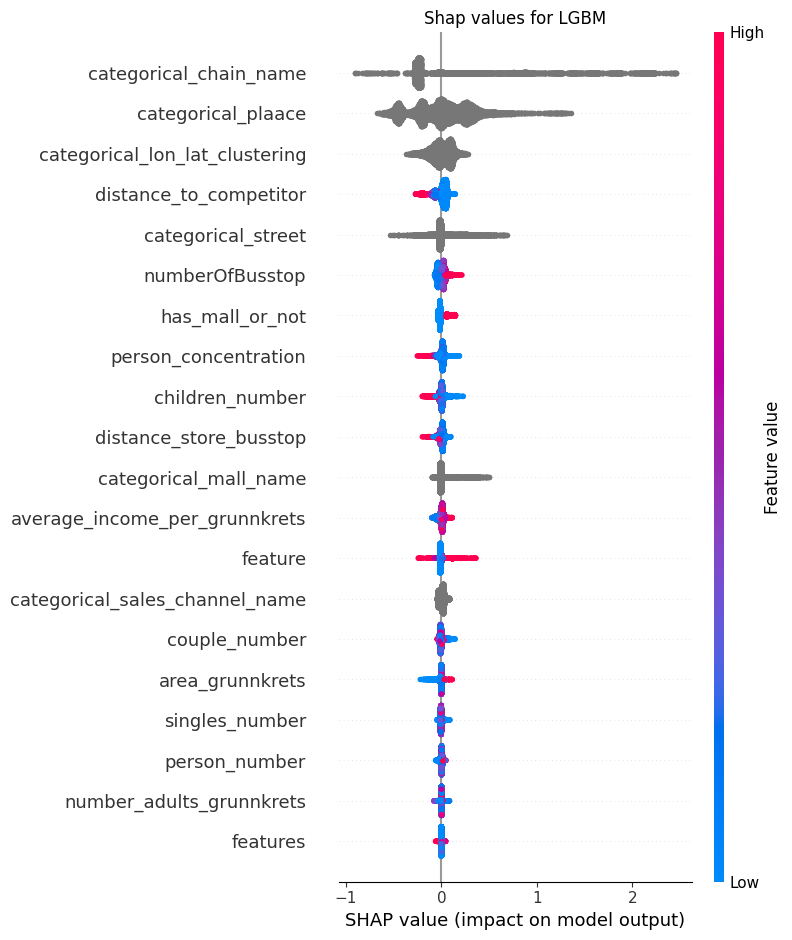

In [239]:
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(features_train)

plt.title('Shap values for LGBM')
shap.summary_plot(shap_values, features_train)